# Expoloring and limiting the dataset 



Setup: https://course.fast.ai/start_colab.html

500 image MNIST dataset which is structured as:
80% train
10% valid
10% test

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from fastai.vision import *
from fastai.gen_doc.nbdoc import *
from fastai.callbacks import *
from fastai.callbacks.hooks import *
from fastai.metrics import Precision, Recall, error_rate

import os

In [3]:
path = untar_data(URLs.MNIST); path

PosixPath('/root/.fastai/data/mnist_png')

In [0]:
tfms = get_transforms(do_flip=False, max_lighting=None, max_zoom=1.2, p_affine=0.5, max_warp=0.2, max_rotate=5.0)

In [0]:
LIMIT_DS = 500
TRAIN_DS_PCT = 0.8
VALID_DS_PCT = 0.1
TEST_DS_PCT = 0.1

TRAINING_DS_SIZE = 63000

In [0]:
train_sz = (LIMIT_DS*TRAIN_DS_PCT)/TRAINING_DS_SIZE
valid_sz = (LIMIT_DS*VALID_DS_PCT)/TRAINING_DS_SIZE
sd_train = ImageList.from_folder(path/'training').split_subsets(train_size=train_sz,valid_size=valid_sz,seed=8080)
ll_train = sd_train.label_from_folder();
data = ImageDataBunch.create_from_ll(ll_train,ds_tfms=tfms, size=24, bs=32).normalize(imagenet_stats)

In [0]:
# @title
# use this to use consistent validation set
# data.save(base_dir+"/tmp/dataBunches/size_65_bs_32.pkl")
# data_test = load_data(file=base_dir+"/tmp/dataBunches/size_65_bs_32.pkl",path=Path(PATH),bs=32,dl_tfms=tfms).normalize(imagenet_stats)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
380 47


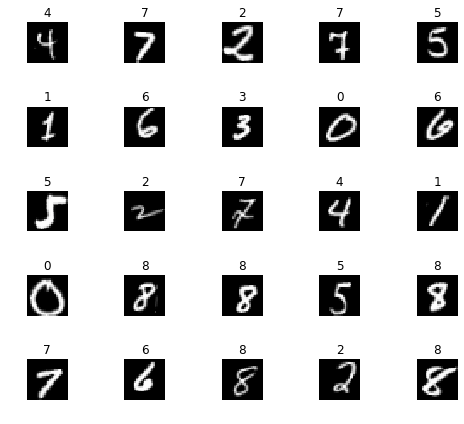

In [18]:
print(data.classes)
print(len(data.train_ds),len(data.valid_ds))
data.show_batch(rows=5, figsize=(7,6))

In [0]:
def find_distribution(target_ds):
  output_dist_ds = {}
  for img in target_ds:
    img_key = int(img[1])
    if img_key in output_dist_ds:
      output_dist_ds[img_key] += 1
    else:
      output_dist_ds[img_key] = 1
  return output_dist_ds

In [0]:
# find the distribution through simple counting occurences
train_ds_dist = find_distribution(data.train_ds)
valid_ds_dist = find_distribution(data.valid_ds)
plt_points = [train_ds_dist,valid_ds_dist]

# ensure we have accurate numbers
train_total = sum([value for entry, value in train_ds_dist.items()])
valid_total = sum([value for entry, value in valid_ds_dist.items()])

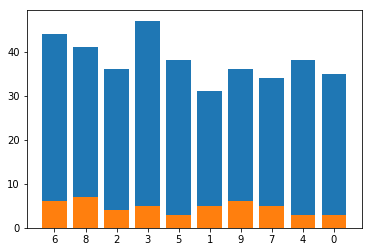

In [33]:
# visualise the training and validation distribution
for ds in plt_points:
  plt.bar(range(len(ds)), list(ds.values()), align='center')
  plt.xticks(range(len(ds)), list(ds.keys()))

In [11]:
# inspect the distribution
for img_key,count in train_ds_dist.items():
  print(img_key,count)

4 43
2 39
7 45
9 34
3 38
8 35
5 28
6 45
0 36
1 37
